<a href="https://colab.research.google.com/github/Deepanshu02Gupta/Covid-19-Prediction-with-Symptoms-/blob/main/Covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#**Importing Dataset**

This dataset contains Covid-19 test reports of random population with different symptoms and other attributes like age, gender and test indication which tells where or how the person was affected by Covid-19.
The data was taken from 10-09-2020 till 12-11-2020, which was around second wave of covid-19 

In [ ]:
df_original = pd.read_csv('Covid 19 symptoms.csv')

In [ ]:
df_original.head()


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12-11-2020,0,0,0,0,0,negative,No,male,Other
1,12-11-2020,0,1,0,0,0,negative,No,male,Other
2,12-11-2020,0,0,0,0,0,negative,Yes,female,Other
3,12-11-2020,0,0,0,0,0,negative,No,male,Other
4,12-11-2020,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
df_original[df_original.corona_result == 'positive'].count()/df_original.count()

test_date              0.100550
cough                  0.100550
fever                  0.100550
sore_throat            0.100550
shortness_of_breath    0.100550
head_ache              0.100550
corona_result          0.100550
age_60_and_above       0.103530
gender                 0.100534
test_indication        0.100550
dtype: float64

##***Exploratory Data Analysis ***

In [ ]:
df_original.shape

(1048575, 10)

In [ ]:
df_original.isnull().sum()

test_date                  0
cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
age_60_and_above       51865
gender                  2880
test_indication            0
dtype: int64

In [ ]:
df_num = df_original[['test_date','gender','cough','fever','sore_throat','shortness_of_breath','head_ache','test_indication','age_60_and_above','corona_result']]

In [ ]:
df_num

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,male,0,0,0,0,0,Other,No,negative
1,12-11-2020,male,0,1,0,0,0,Other,No,negative
2,12-11-2020,female,0,0,0,0,0,Other,Yes,negative
3,12-11-2020,male,0,0,0,0,0,Other,No,negative
4,12-11-2020,male,0,1,0,0,0,Contact with confirmed,No,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,female,0,0,0,0,0,Other,No,negative
1048571,10-09-2020,female,0,0,0,0,0,Other,No,negative
1048572,10-09-2020,male,0,0,0,0,0,Other,No,negative
1048573,10-09-2020,female,0,0,0,0,0,Other,No,negative


###**Converting 'age_60_and_above' and 'gender' attribute into Boolean Values by using Dictonary. This encoding helps in better prediction model (using numerical vaues rather than categorical)**


In [ ]:
df_num['age_60_and_above'] = df_original.loc[:,['age_60_and_above']].transform(lambda x: x.map(lambda x: {'Yes': '1', 'No': '0'}.get(x)))

In [ ]:
df_num['gender'] = df_original.loc[:,['gender']].transform(lambda x: x.map(lambda x: {'male': '1', 'female': '0'}.get(x)))


###**One hot encoding the test_indication column into 3 categories**         
###**Abroad: 0 , Contact with Confirmed: 1 , Other : 2**

In [ ]:
One_hot_encoder = LabelEncoder()
df_num['test_indication'] = One_hot_encoder.fit_transform(df_num['test_indication'])

In [ ]:
df_num


,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,1,0,0,0,0,0,2,0,negative
1,12-11-2020,1,0,1,0,0,0,2,0,negative
2,12-11-2020,0,0,0,0,0,0,2,1,negative
3,12-11-2020,1,0,0,0,0,0,2,0,negative
4,12-11-2020,1,0,1,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,0,0,0,0,0,0,2,0,negative
1048571,10-09-2020,0,0,0,0,0,0,2,0,negative
1048572,10-09-2020,1,0,0,0,0,0,2,0,negative
1048573,10-09-2020,0,0,0,0,0,0,2,0,negative


In [ ]:
df_num.isnull().sum()
df_num

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,1,0,0,0,0,0,2,0,negative
1,12-11-2020,1,0,1,0,0,0,2,0,negative
2,12-11-2020,0,0,0,0,0,0,2,1,negative
3,12-11-2020,1,0,0,0,0,0,2,0,negative
4,12-11-2020,1,0,1,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,0,0,0,0,0,0,2,0,negative
1048571,10-09-2020,0,0,0,0,0,0,2,0,negative
1048572,10-09-2020,1,0,0,0,0,0,2,0,negative
1048573,10-09-2020,0,0,0,0,0,0,2,0,negative


In [ ]:
df_num.dropna(inplace=True)

In [ ]:
df_num

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,1,0,0,0,0,0,2,0,negative
1,12-11-2020,1,0,1,0,0,0,2,0,negative
2,12-11-2020,0,0,0,0,0,0,2,1,negative
3,12-11-2020,1,0,0,0,0,0,2,0,negative
4,12-11-2020,1,0,1,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,0,0,0,0,0,0,2,0,negative
1048571,10-09-2020,0,0,0,0,0,0,2,0,negative
1048572,10-09-2020,1,0,0,0,0,0,2,0,negative
1048573,10-09-2020,0,0,0,0,0,0,2,0,negative


In [ ]:
# Chances of having covid when you have all the symptoms
df_num_allsymp = df_num.loc[(df_num.cough == 1) & (df_num.fever == 1) & (df_num.sore_throat == 1) & (df_num.shortness_of_breath == 1)]
pos_count = df_num_allsymp[df_num_allsymp['corona_result'] == 'positive'].count()

covid_chances = pos_count/df_num_allsymp.count()
print("Chances of having Covid-19 when a person has all four symptoms (cough,fever,sore_throat,shortness_of_breadth) are: {} %".format(round(covid_chances[0]*100)))

# Chances of having covid when you have anyone one of the sypmtoms

# df_num_any1 = df_num.loc[(df_num.cough == 1) | (df_num.fever == 1) | (df_num.sore_throat == 1) | (df_num.shortness_of_breath == 1) & (df_num.corona_result == 'positive')]
# pos_count1 = df_num_any1[df_num_any1['corona_result'] == 'positive'].count()

# covid_chances1 = pos_count1/df_num_any1.count()
# print("Chances of having Covid-19 when a person has anyone of the symptoms (cough,fever,sore_throat,shortness_of_breadth) are: {} %".format(round(covid_chances1[0])))


Chances of having Covid-19 when a person has all four symptoms (cough,fever,sore_throat,shortness_of_breadth) are: 87 %


It tells us, there is 85% chance of having covid given you have all the symptoms mentioned above.

#**Data Visualisation**

---



In [ ]:
df_num_pos = df_num.loc[df_num.corona_result == 'positive']

In [ ]:
df_num_pos

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
136,12-11-2020,0,0,0,0,0,0,2,1,positive
149,12-11-2020,0,0,0,0,0,0,2,0,positive
181,12-11-2020,1,0,0,0,0,0,2,0,positive
182,12-11-2020,0,0,0,0,0,0,2,0,positive
195,12-11-2020,0,1,1,0,0,0,2,1,positive
...,...,...,...,...,...,...,...,...,...,...
1048543,10-09-2020,0,1,1,0,0,1,2,1,positive
1048544,10-09-2020,1,0,0,0,0,0,1,1,positive
1048546,10-09-2020,1,0,0,0,0,1,1,0,positive
1048547,10-09-2020,1,0,0,0,0,1,1,0,positive


In [ ]:
df_num_neg = df_num.loc[df_num.corona_result == 'negative']

In [ ]:
df_num_neg

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,1,0,0,0,0,0,2,0,negative
1,12-11-2020,1,0,1,0,0,0,2,0,negative
2,12-11-2020,0,0,0,0,0,0,2,1,negative
3,12-11-2020,1,0,0,0,0,0,2,0,negative
4,12-11-2020,1,0,1,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,0,0,0,0,0,0,2,0,negative
1048571,10-09-2020,0,0,0,0,0,0,2,0,negative
1048572,10-09-2020,1,0,0,0,0,0,2,0,negative
1048573,10-09-2020,0,0,0,0,0,0,2,0,negative


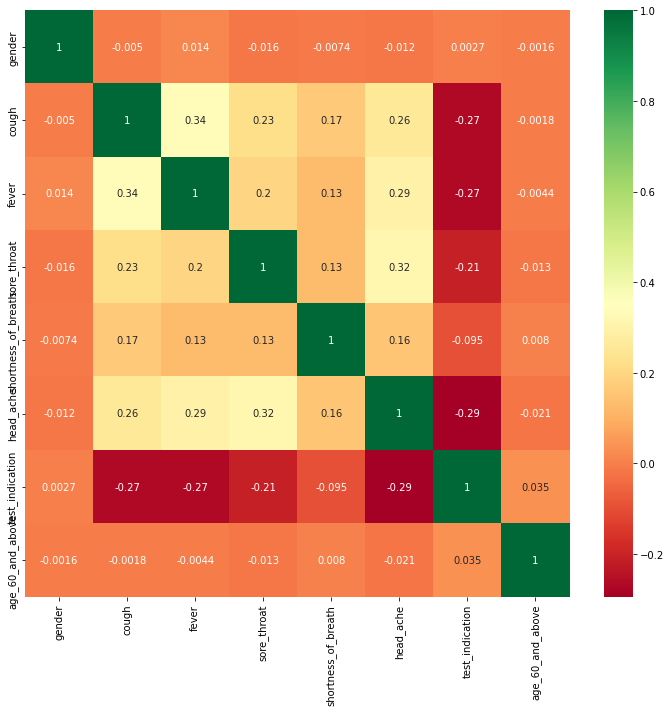

In [ ]:
X1 = df_num.iloc[:,1:9]  #independent columns
y1 = df_num.iloc[:,-1]    #target column i.e price range\

#get correlations of each features in dataset
corrmat = df_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")


## Plotting histogram to check whether sypmtoms like cough, fever, sore throat and shortness of breadth affect the test results for covid for the given population.

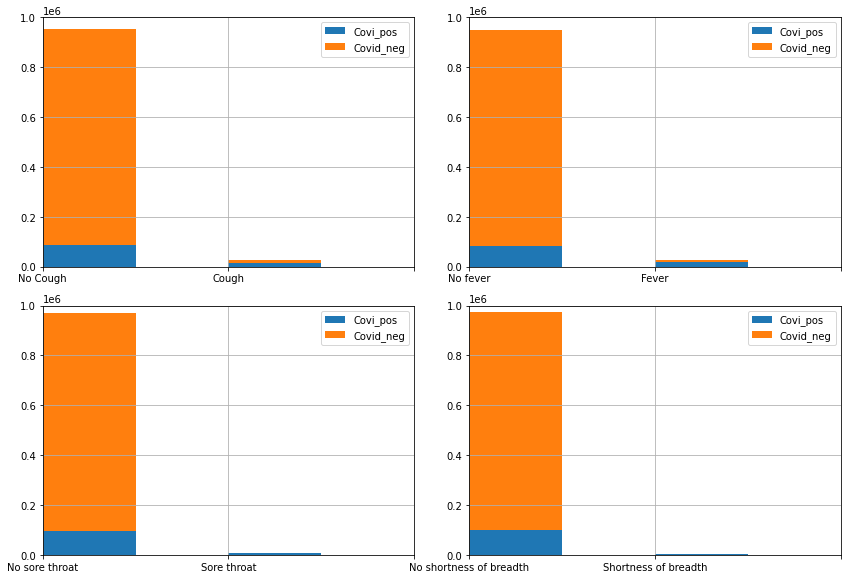

In [ ]:
fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(nrows = 2, ncols=2,figsize = (12,8))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax0.hist([df_num_pos.cough,df_num_neg.cough],
         bins = [-1,0,1,2],
         histtype = 'bar',
         stacked = True,
         width = 0.5
         );
ax0.legend(['Covi_pos','Covid_neg'])

ax1.hist([df_num_pos.fever,df_num_neg.fever],
         bins = np.arange(-1,3,1),
         histtype = 'bar',
         stacked = True,
         width = 0.5
         );
ax1.legend(['Covi_pos','Covid_neg'])

ax2.hist([df_num_pos.sore_throat,df_num_neg.sore_throat],
         bins = np.arange(-1,3,1),
         histtype = 'bar',
         stacked = True,
         width = 0.5
         );
ax2.legend(['Covi_pos','Covid_neg'])

ax3.hist([df_num_pos.shortness_of_breath,df_num_neg.shortness_of_breath],
         bins = np.arange(-1,3,1),
         histtype = 'bar',
         stacked = True,
         width = 0.5
         );
ax3.legend(['Covi_pos','Covid_neg'])

fig.tight_layout()
ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()


plt.setp(ax0,xticks = [0,1,2],xticklabels = ['No Cough','Cough'])
plt.setp(ax1,xticks = [0,1,2],xticklabels = ['No fever','Fever'])
plt.setp(ax2,xticks = [0,1,2],xticklabels = ['No sore throat','Sore throat'])
plt.setp(ax3,xticks = [0,1,2],xticklabels = ['No shortness of breadth','Shortness of breadth'])

ax0.set_xlim(0,2)
ax0.set_ylim(0,1000000)

ax1.set_xlim(0,2)
ax1.set_ylim(0,1000000)

ax2.set_xlim(0,2)
ax2.set_ylim(0,1000000)

ax3.set_xlim(0,2)
ax3.set_ylim(0,1000000)
plt.show()



## Finding Unique Values of each attributes to understand them and deciding which to use for model 

In [ ]:
for i in df_num.columns[2:]:
    print("\nColumn Name:",i,"-->",df_num[i].unique(),"-->Unique Count",len(df_num[i].unique()))


Column Name: cough --> [0 1] -->Unique Count 2

Column Name: fever --> [0 1] -->Unique Count 2

Column Name: sore_throat --> [0 1] -->Unique Count 2

Column Name: shortness_of_breath --> [0 1] -->Unique Count 2

Column Name: head_ache --> [0 1] -->Unique Count 2

Column Name: test_indication --> [2 1 0] -->Unique Count 3

Column Name: age_60_and_above --> ['0' '1'] -->Unique Count 2

Column Name: corona_result --> ['negative' 'positive' 'other'] -->Unique Count 3


In [ ]:
df_num[['gender','cough','fever','sore_throat','shortness_of_breath','head_ache']]  = df_num[['gender','cough','fever','sore_throat','shortness_of_breath','head_ache']].apply(pd.to_numeric)

## **PCA Analysis**

In [ ]:
  features = ['cough','fever','sore_throat','shortness_of_breadth']

# Separating out the features
x = df_num.iloc[:, 2:9].values

# Separating out the target
y = df_num.iloc[:, -1].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])


In [ ]:
principalComponents = pd.DataFrame(principalComponents)
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

principalComponents.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7'})
principalComponents['Observed result'] = y
principalComponents

,0,1,2,3,4,5,6,Observed result
0,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
1,2.305327,-0.205408,-0.873257,-2.473947,-2.138948,-2.926023,3.077759,negative
2,-0.444827,2.463737,-0.588332,0.227469,0.139329,-0.023947,-0.019313,negative
3,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
4,3.911132,-0.686368,-1.925312,-2.989056,0.821476,-1.815634,3.909467,negative
...,...,...,...,...,...,...,...,...
995316,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995317,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995318,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995319,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative


In [ ]:
finalDf = pd.concat([principalDf, df_num[['corona_result']]], axis = 1)
finalDf.dropna(inplace = True)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,corona_result
0,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
1,2.305327,-0.205408,-0.873257,-2.473947,-2.138948,-2.926023,3.077759,negative
2,-0.444827,2.463737,-0.588332,0.227469,0.139329,-0.023947,-0.019313,negative
3,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
4,3.911132,-0.686368,-1.925312,-2.989056,0.821476,-1.815634,3.909467,negative
...,...,...,...,...,...,...,...,...
995316,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995317,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995318,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative
995319,-0.368763,-0.363351,0.169868,0.033847,-0.120773,-0.034671,-0.021729,negative


In [ ]:
x = pca.explained_variance_ratio_
x[:10].sum()

0.9999999999999999

In [ ]:
explained_var = pd.DataFrame(x,columns= ['Explained Variance'])
explained_var['Explained Variance'] = explained_var['Explained Variance']*100 
explained_var['PC'] = ['1','2','3','4','5','6','7']
explained_var = explained_var[['PC','Explained Variance']]

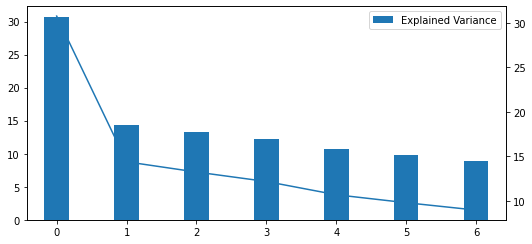

In [ ]:
explained_var[['PC','Explained Variance']].plot(kind = 'bar',width = 0.35)
explained_var['Explained Variance'].plot(secondary_y = True)

In [ ]:
X_num_PC = principalComponents.iloc[:, 1:7].values
Y_num_PC = principalComponents.iloc[:, -1].values
print(X_num_PC)

[[-0.36335119  0.16986849  0.03384658 -0.12077277 -0.03467076 -0.02172898]
 [-0.20540788 -0.87325662 -2.47394733 -2.13894767 -2.92602336  3.07775903]
 [ 2.46373693 -0.58833176  0.2274687   0.1393293  -0.02394687 -0.01931332]
 ...
 [-0.36335119  0.16986849  0.03384658 -0.12077277 -0.03467076 -0.02172898]
 [-0.36335119  0.16986849  0.03384658 -0.12077277 -0.03467076 -0.02172898]
 [ 2.46373693 -0.58833176  0.2274687   0.1393293  -0.02394687 -0.01931332]]


In [ ]:
X_num = df_num.iloc[:, 1:8].values
Y_num = df_num.iloc[:, -1].values
print(X_num)

[[1 0 0 ... 0 0 2]
 [1 0 1 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 ...
 [1 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [1 0 0 ... 0 0 2]]


**Splitting the dataset into Training set and Testing set, using train_test_split module**

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_num_PC,Y_num_PC, test_size=0.20, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'entropy', max_depth= 4, n_estimators= 100)

rfc1.fit(X_train1, y_train1)

pred=rfc1.predict(X_test1)


### **Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test1,pred))

Accuracy for Random Forest on CV data:  0.9030517670107754


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,pred)

array([[173211,      0,   1890],
       [  3063,      0,    262],
       [ 14084,      0,   6555]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_num,Y_num, test_size=0.20, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'entropy', max_depth= 4, n_estimators= 100)

rfc1.fit(X_train1, y_train1)


In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test1,pred))

### ***Confusion Matrix***

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,pred)

**Installing CatBoost Classifier: It can use categorical features directly and is scalable in nature.**

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 53 kB/s 


**Splitting Dataset into Training and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_num,Y_num, test_size=0.20, random_state=42)

**Importing module CatBoostClassifier**

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=20,learning_rate=0.1)

In [ ]:
model.fit(X_train2,y_train2,plot=False)

0:	learn: 0.9429794	total: 227ms	remaining: 4.32s
1:	learn: 0.8270370	total: 384ms	remaining: 3.46s
2:	learn: 0.7362686	total: 539ms	remaining: 3.06s
3:	learn: 0.6633412	total: 869ms	remaining: 3.47s
4:	learn: 0.6037479	total: 1.14s	remaining: 3.42s
5:	learn: 0.5536444	total: 1.48s	remaining: 3.46s
6:	learn: 0.5113887	total: 1.8s	remaining: 3.35s
7:	learn: 0.4756300	total: 2.14s	remaining: 3.21s
8:	learn: 0.4450285	total: 2.42s	remaining: 2.96s
9:	learn: 0.4190265	total: 2.75s	remaining: 2.75s
10:	learn: 0.3964177	total: 3.08s	remaining: 2.52s
11:	learn: 0.3771158	total: 3.37s	remaining: 2.25s
12:	learn: 0.3603037	total: 3.69s	remaining: 1.99s
13:	learn: 0.3458554	total: 4.02s	remaining: 1.72s
14:	learn: 0.3333169	total: 4.29s	remaining: 1.43s
15:	learn: 0.3222490	total: 4.6s	remaining: 1.15s
16:	learn: 0.3127414	total: 4.93s	remaining: 870ms
17:	learn: 0.3043369	total: 5.31s	remaining: 590ms
18:	learn: 0.2970620	total: 5.6s	remaining: 295ms
19:	learn: 0.2908743	total: 5.88s	remaining:

In [ ]:
predict_train = model.predict(X_train1)
print('\nTarget on train data',predict_train)


Target on train data [['negative']
 ['negative']
 ['negative']
 ...
 ['negative']
 ['negative']
 ['negative']]


In [ ]:
accuracy_train = accuracy_score(y_train1,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9255908958272542


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)

0.8987767814532942

**Prediction using SVC: Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train1, y_train1)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
print(cm)
accuracy_score(y_test1, y_pred)

[[169352      0   5749]
 [  2788      0    537]
 [ 10261      0  10378]]


0.902870921558285

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
learning_rates = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.20, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4 ]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=15, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train2, y_train2)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train2, y_train2)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test2, y_test2)))

Learning rate:  0.05
Accuracy score (training): 0.913
Accuracy score (validation): 0.913
Learning rate:  0.075
Accuracy score (training): 0.918
Accuracy score (validation): 0.918
Learning rate:  0.1
Accuracy score (training): 0.920
Accuracy score (validation): 0.920
Learning rate:  0.125
Accuracy score (training): 0.921
Accuracy score (validation): 0.922
Learning rate:  0.15
Accuracy score (training): 0.921
Accuracy score (validation): 0.922
Learning rate:  0.175
Accuracy score (training): 0.924
Accuracy score (validation): 0.924
Learning rate:  0.2
Accuracy score (training): 0.924
Accuracy score (validation): 0.924
Learning rate:  0.225
Accuracy score (training): 0.924
Accuracy score (validation): 0.925
Learning rate:  0.25
Accuracy score (training): 0.924
Accuracy score (validation): 0.925
Learning rate:  0.275
Accuracy score (training): 0.924
Accuracy score (validation): 0.925
Learning rate:  0.3
Accuracy score (training): 0.924
Accuracy score (validation): 0.925
Learning rate:  0.3

In [ ]:
df_num

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
0,12-11-2020,1,0,0,0,0,0,2,0,negative
1,12-11-2020,1,0,1,0,0,0,2,0,negative
2,12-11-2020,0,0,0,0,0,0,2,1,negative
3,12-11-2020,1,0,0,0,0,0,2,0,negative
4,12-11-2020,1,0,1,0,0,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
1048570,10-09-2020,0,0,0,0,0,0,2,0,negative
1048571,10-09-2020,0,0,0,0,0,0,2,0,negative
1048572,10-09-2020,1,0,0,0,0,0,2,0,negative
1048573,10-09-2020,0,0,0,0,0,0,2,0,negative


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df_num.iloc[:,1:9]  #independent columns
y = df_num.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs          Score
5            head_ache  115057.667740
2                fever   95560.100217
1                cough   65147.174271
3          sore_throat   52857.751713
4  shortness_of_breath   15883.601751
6      test_indication    6048.145196
0               gender     319.325678
7     age_60_and_above      96.999443


In [ ]:
df_num['age_60_and_above'] = df_num['age_60_and_above'].astype(int)


In [ ]:
df_num.dtypes

test_date              object
gender                  int64
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
test_indication         int64
age_60_and_above        int64
corona_result          object
dtype: object

In [ ]:
df1 = df_num.loc[(df_num['corona_result'] == 'positive') & (df_num['head_ache'] == 1)]

In [ ]:
df1

,test_date,gender,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication,age_60_and_above,corona_result
452,12-11-2020,1,0,0,0,0,1,2,0,positive
868,12-11-2020,1,0,1,1,0,1,2,0,positive
1348,12-11-2020,0,1,1,0,0,1,2,0,positive
1393,12-11-2020,1,1,1,1,0,1,2,0,positive
1486,12-11-2020,1,0,0,0,0,1,2,0,positive
...,...,...,...,...,...,...,...,...,...,...
1048526,10-09-2020,0,1,1,1,0,1,1,0,positive
1048527,10-09-2020,0,1,0,0,0,1,2,0,positive
1048543,10-09-2020,0,1,1,0,0,1,2,1,positive
1048546,10-09-2020,1,0,0,0,0,1,1,0,positive


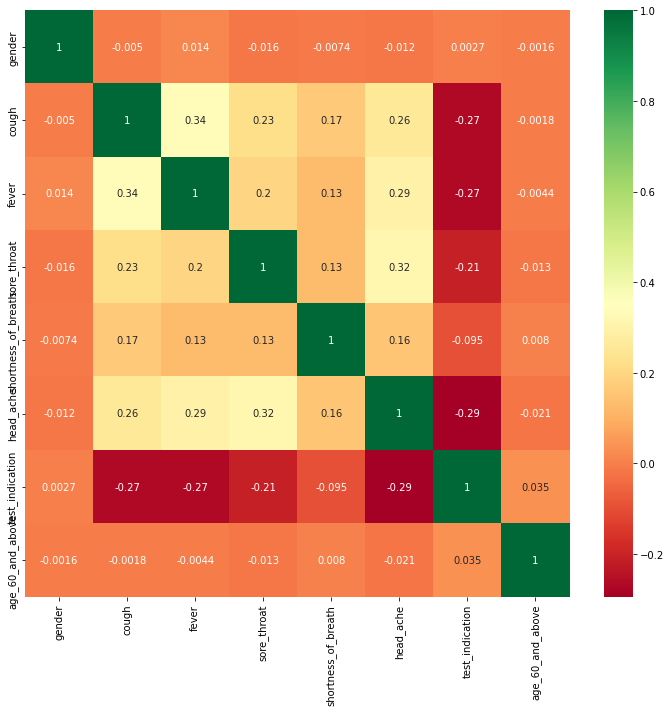

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

